In [22]:
import matplotlib.pyplot as plt
import imblearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

In [4]:
svm = SVC(kernel='rbf', C=10, random_state=42, probability = True)
RF = RandomForestClassifier(random_state=42)
LR = LogisticRegression(random_state = 42)
DT = DecisionTreeClassifier(random_state=42)
BB = BalancedBaggingClassifier(DecisionTreeClassifier(random_state=42), bootstrap = True, random_state=42)
AB = AdaBoostClassifier()
GB = GradientBoostingClassifier(n_estimators=200, learning_rate = 0.1, max_features=2, max_depth = 50, random_state = 42)
XGB = XGBClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 50, subsample = 1)
models = [svm, RF, LR, DT, BB, GB, XGB]

In [3]:
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer as FA

In [6]:
bankrupt = pd.read_csv("outlier_removed_scaled.csv")
bankrupt.drop(bankrupt.columns[0], axis = 1, inplace = True)
bankrupt.head()

,Attr1,Attr5,Attr6,Attr10,Attr15,Attr17,Attr18,Attr19,Attr20,Attr21,...,Attr47,Attr54,Attr55,Attr57,Attr59,Attr60,Attr61,Attr63,Attr64,class
0,0.825518,0.354326,0.446455,0.935388,0.535183,0.390249,0.825624,0.198565,0.326250,0.113042,...,0.295389,0.126600,0.324339,0.278214,0.362919,0.223740,0.133221,0.290416,0.063522,0
1,0.840844,0.354319,0.442478,0.937377,0.533641,0.281383,0.843568,0.200601,0.000000,0.094479,...,0.129272,0.129951,0.322302,0.280835,0.362623,0.432771,0.315668,0.341677,0.313909,0
2,0.815517,0.354327,0.446550,0.934436,0.533525,0.353376,0.815517,0.197817,0.000000,0.076257,...,0.129272,0.126727,0.322387,0.275078,0.362768,0.225466,0.109511,0.244347,0.158281,0
3,0.828908,0.354464,0.447444,0.936211,0.533716,0.432543,0.829592,0.198917,0.366537,0.106639,...,0.331060,0.127676,0.402793,0.278928,0.362623,0.191418,0.208927,0.365883,0.226220,0
4,0.831493,0.354225,0.448741,0.935711,0.533718,0.398505,0.832705,0.199659,0.377965,0.132312,...,0.364796,0.126694,0.322294,0.279581,0.362814,0.182541,0.175489,0.292142,0.084281,0


In [7]:
oversample = SMOTE()
X2,y2 = oversample.fit_resample(X = bankrupt.iloc[:,:-1], y = bankrupt.iloc[:,-1])
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

In [8]:
pca=PCA(.95)
pca.fit(X2_train)
X_train_pca=pca.transform(X2_train)
X_test_pca=pca.transform(X2_test)

In [9]:
X_train_final = pd.DataFrame(X_train_pca)
X_test_final = pd.DataFrame(X_test_pca)
X_train_final.head()

,0,1,2,3,4,5,6,7
0,0.154397,0.088964,-0.120880,0.018944,0.001448,-0.026964,0.010168,-0.007114
1,0.191446,-0.175928,-0.055837,-0.026064,0.025984,0.040352,-0.006988,-0.007172
2,-0.114462,-0.079144,-0.060274,0.026485,-0.075010,0.025836,-0.005201,0.002916
3,0.274450,-0.106407,-0.112439,0.039433,0.083480,-0.037005,0.003211,-0.007457
4,-0.111968,-0.028626,0.044671,0.065412,0.039954,-0.027276,-0.026993,-0.028273


In [10]:
cov_mat=np.cov(X2_train.T)
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)

In [11]:
X2_train

array([[0.82642883, 0.3541287 , 0.44657743, ..., 0.19712963, 0.21238044,
        0.28573203],
       [0.82672896, 0.35327234, 0.44623406, ..., 0.13581636, 0.07274012,
        0.06759892],
       [0.82725459, 0.35437248, 0.44654988, ..., 0.1143393 , 0.22625143,
        0.25077931],
       ...,
       [0.82878705, 0.35457003, 0.44654988, ..., 0.12212217, 0.42296105,
        0.34261399],
       [0.83083198, 0.35430299, 0.44734486, ..., 0.18939127, 0.4266582 ,
        0.49702576],
       [0.82741003, 0.35421867, 0.4467478 , ..., 0.24870023, 0.31227049,
        0.19471531]])

C:\Users\kmh50\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


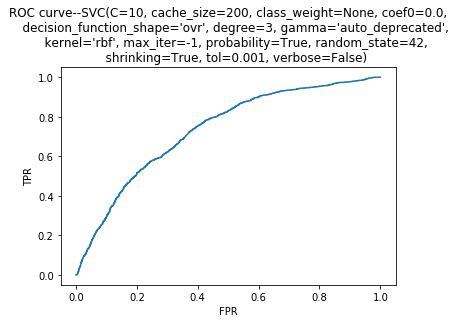

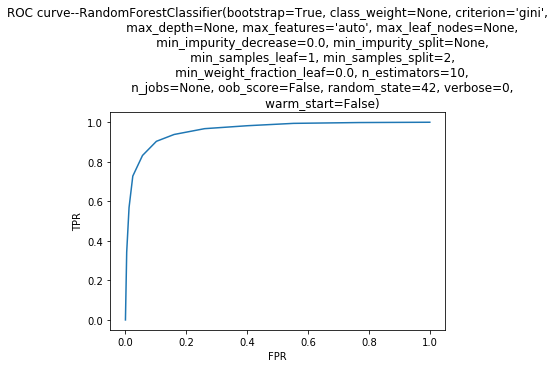

C:\Users\kmh50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


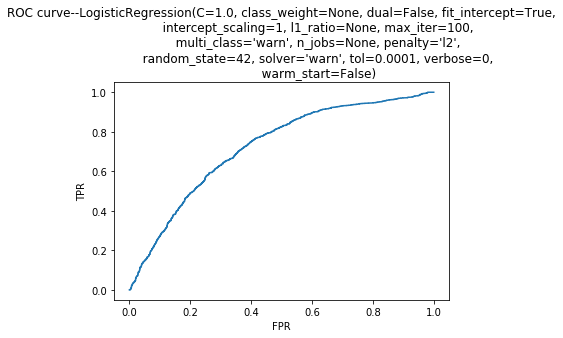

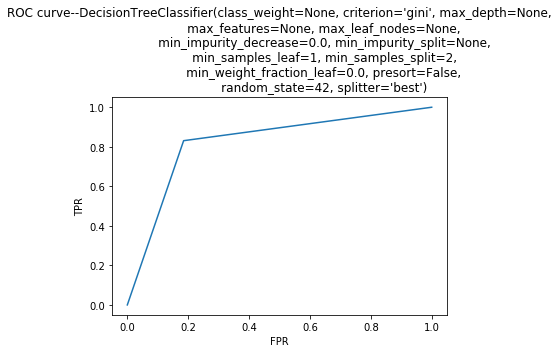

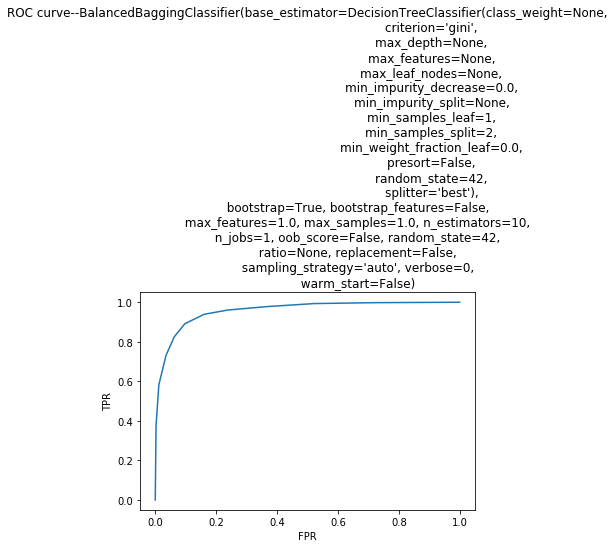

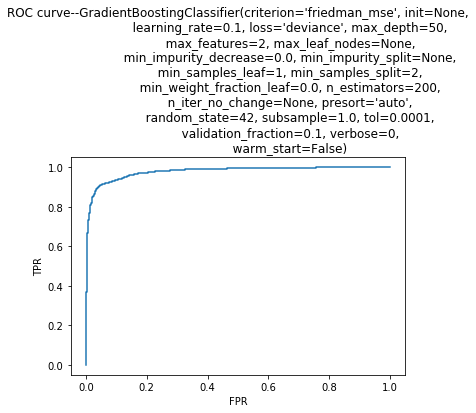

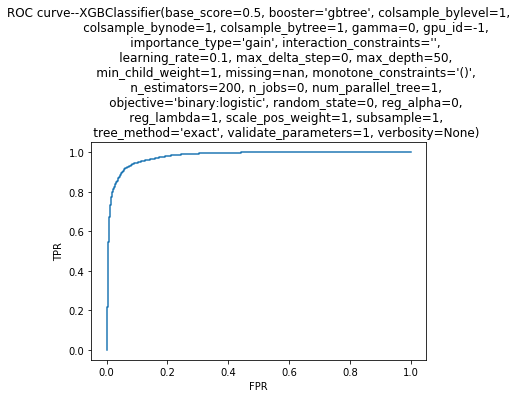

In [16]:
for i in range(len(models)):
        clf = models[i]
        clf = clf.fit(X_train_final, y2_train)
        y2_test_predicted = clf.predict(X_test_final)
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, clf.predict_proba(X_test_final)[:,1])
        
        plt.clf()
        plt.plot(false_positive_rate, true_positive_rate)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC curve-' + '-' + str(clf))
        plt.show()

In [17]:
from sklearn.metrics import classification_report
for i in range(len(models)):
        clf = models[i]
        clf = clf.fit(X_train_final, y2_train)
        y2_test_predicted = clf.predict(X_test_final)
        print(classification_report(y2_test, y2_test_predicted, target_names=['class 0', 'class 1']))

C:\Users\kmh50\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

     class 0       0.71      0.60      0.65      1946
     class 1       0.65      0.75      0.70      1939

    accuracy                           0.68      3885
   macro avg       0.68      0.68      0.67      3885
weighted avg       0.68      0.68      0.67      3885

              precision    recall  f1-score   support

     class 0       0.90      0.90      0.90      1946
     class 1       0.90      0.90      0.90      1939

    accuracy                           0.90      3885
   macro avg       0.90      0.90      0.90      3885
weighted avg       0.90      0.90      0.90      3885

              precision    recall  f1-score   support

     class 0       0.69      0.63      0.66      1946
     class 1       0.66      0.71      0.68      1939

    accuracy                           0.67      3885
   macro avg       0.67      0.67      0.67      3885
weighted avg       0.67      0.67      0.67      3885

              preci

C:\Users\kmh50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



              precision    recall  f1-score   support

     class 0       0.89      0.90      0.90      1946
     class 1       0.90      0.89      0.90      1939

    accuracy                           0.90      3885
   macro avg       0.90      0.90      0.90      3885
weighted avg       0.90      0.90      0.90      3885

              precision    recall  f1-score   support

     class 0       0.92      0.92      0.92      1946
     class 1       0.92      0.92      0.92      1939

    accuracy                           0.92      3885
   macro avg       0.92      0.92      0.92      3885
weighted avg       0.92      0.92      0.92      3885

              precision    recall  f1-score   support

     class 0       0.94      0.91      0.93      1946
     class 1       0.91      0.94      0.93      1939

    accuracy                           0.93      3885
   macro avg       0.93      0.93      0.93      3885
weighted avg       0.93      0.93      0.93      3885



In [65]:
from sklearn.metrics import auc

for i in range(len(models)):
    score = pd.DataFrame(columns=["F1_score","Precisions","Recalls", "AUC"])
    clf = models[i]
    clf = clf.fit(X_train_final, y2_train)
    y2_test_predicted = clf.predict(X_test_final)
    f1=f1_score(y2_test, y2_test_predicted, average='weighted')
    precisions = precision_score(y2_test, y2_test_predicted)
    recalls = recall_score(y2_test, y2_test_predicted)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, clf.predict_proba(X_test_final)[:,1])
    auc_score = auc(false_positive_rate, true_positive_rate)
    list1 = [f1, precisions, recalls, auc_score]
    score.loc[i] = list1
    print(score)

C:\Users\kmh50\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


   F1_score  Precisions   Recalls       AUC
0   0.67442    0.652759  0.750387  0.731774
   F1_score  Precisions   Recalls       AUC
1  0.900901    0.898462  0.903559  0.959425
   F1_score  Precisions  Recalls       AUC
2  0.671247    0.657795  0.71377  0.722557


C:\Users\kmh50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


   F1_score  Precisions   Recalls       AUC
3  0.822899    0.817352  0.830841  0.822923
   F1_score  Precisions   Recalls       AUC
4  0.897036    0.901408  0.891181  0.957443
   F1_score  Precisions   Recalls       AUC
5  0.923037    0.924431  0.921093  0.977147
   F1_score  Precisions   Recalls       AUC
6  0.926367    0.913043  0.942238  0.978227


models = [svm, RF, LR, DT, BB, GB, XGB] 순서

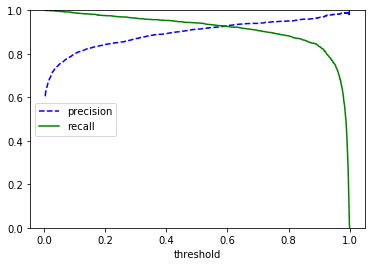

In [70]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    precisions, recalls, thresholds = precision_recall_curve(y2_test, clf.predict_proba(X_test_final)[:,1])
    plt.plot(thresholds, precisions[:3168], "b--", label='precision')
    plt.plot(thresholds, recalls[:3168], "g-", label='recall')
    plt.xlabel("threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()